In [49]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "fitbit"

# About Bellabeat

Bellabeat, founded in 2013 by Urska Srsen and Sando Mur, is a successful high-tech manufacturer of health-focused smart products for women. By 2016 they were positioned globally as a tech-driven wellness company for women. They now have offices around the world and have multiple products that collect data on user's activity, sleep, stress, and reproductive health. With their beautifully designed technology, their goals are two-fold - empower women around the world with knowledge about their own health and habits AND become a larger player in the global smart device market. 

Bellebeat's products are available through a growing number of online retailers as well as their own e-commerce channel on their website. While they've invested in traditional advertising medium, most of their marketing is focused on digital platforms. 

# Business Task

The objective is to uncover additional opportunities to empower more women around the world about their own health and habits AND become a larger player in the global device market. With an analysis of Bellebeat's available consumer data, Srsen believes this is possible. In order to uncover these opportunities, I'll first gather and analyze non-Bellabeat user data to gain insights into how consumers are using other smart devices. I'll then apply this knowledge to one of Bellabeat's products and make high-level recommendations for a marketing strategy.

I'll present my findings and recommendations to the following:

* Urska Srsen, Co-founder & Chief Creative Officer
* Sando Mur, Co-founder & Key Member of Executive Team
* Marketing Analytics Team




# Prepare

**Data Sources Used** 

I've been asked to use FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. These users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

I'm disregarding the csv files with minute and hourly recorded data to focus on the compiled daily data. 

**Data Credibility & Potential Bias**

Some limitations on the data do exist. While the data appears to be comprehensive and cited, it may not be reliable. The sample selection is small (30 participants) and may not be enough to reflect the overall population. Also, it is outdated (2016) and the gender is not specified.  

**Data Storage**

The data was downloaded directly from Mobius's Kaggle and imported here using R's read.csv. 

In [50]:
# Load skimr for summary statistics and janitor to help with cleaning data

install.packages('skimr')
install.packages('janitor')
library(skimr)
library(janitor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘skimr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘janitor’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


**1. Import/ read data and rename for clarity and ease of use.**

In [51]:
# get datasets and rename
daily_activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

# Process

I will be using R programming language with the Tidyverse package. Tidyverse includes the following to help me clean, organize, and process the data:

* readr to import csv files
* tidyr for data cleaning
* dplyr for data manipulation
* lubridate to convert date/time
* ggplot2 for visualizations

**Inspect data to check for missing, null, uneccessary, and insufficient data using head() and glimpse()**

In [52]:
# inspect data
head(daily_activity)
glimpse(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [53]:
head(daily_calories)
glimpse(daily_calories)

,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


Rows: 940
Columns: 3
$ Id          <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366…
$ ActivityDay <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016", "4/16/…
$ Calories    <int> 1985, 1797, 1776, 1745, 1863, 1728, 1921, 2035, 1786, 1775…


In [54]:
head(daily_intensities)
glimpse(daily_intensities)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


Rows: 940
Columns: 10
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDay              <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ SedentaryMinutes         <int> 728, 776, 1218, 726, 773, 539, 1149, 775, 818…
$ LightlyActiveMinutes     <int> 328, 217, 181, 209, 221, 164, 233, 264, 205, …
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…


In [55]:
head(daily_steps)
glimpse(daily_steps)

,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


Rows: 940
Columns: 3
$ Id          <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1503960366…
$ ActivityDay <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/2016", "4/16/…
$ StepTotal   <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019, 15506, 1054…


In [56]:
head(daily_sleep)
glimpse(daily_sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


In [57]:
head(weight_log)
glimpse(weight_log)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <int> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <chr> "True", "True", "False", "True", "True", "True", "True"…
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


**Initial Observations: There appears to be missing, null, and insuffient data as well as data that's already been aggregated.**

- there are 940 observations in all except for 'weightLog' (67) and 'daily_sleep'(413)
- daily_activity appears to have aggregated data (daily_intensities and daily_calories)
- date variable name is different across datasets 
- date format is character
- date in daily_sleep only is date-time stamp 
- time in daily_sleep appears to be 12:00:00 AM for all entries 
- daily_activity and daily_intensities have null values

In [58]:
# count number of 'Id' combinations in each to check for unique participants
n_distinct(daily_activity$Id)
n_distinct(daily_calories$Id)
n_distinct(daily_intensities$Id)
n_distinct(daily_steps$Id)
n_distinct(daily_sleep$Id)
n_distinct(weight_log$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

**Findings:**

There are only eight participants recorded in weight_log. I can't proxy the data or collect more so I'll disregard it in my analysis. *The sample size is too small to represent the average result of a population.*

In [59]:
# check the variables with colnames() to see if any of the data has already been aggregated
colnames(daily_activity)
colnames(daily_calories)
colnames(daily_intensities)
colnames(daily_steps)
colnames(daily_sleep)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"          "ActivityDay" "Calories"

[1] "Id"                       "ActivityDay"             
 [3] "SedentaryMinutes"         "LightlyActiveMinutes"    
 [5] "FairlyActiveMinutes"      "VeryActiveMinutes"       
 [7] "SedentaryActiveDistance"  "LightActiveDistance"     
 [9] "ModeratelyActiveDistance" "VeryActiveDistance"

[1] "Id"          "ActivityDay" "StepTotal"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

**Findings:** 

The data in daily_calories, daily_intensities, and daily_steps has already been aggregated into daily_activity so, I'll disregard those datasets in my analysis. *I've narrowed it down to working with daily_activity and daily_sleep.***

**I'll do some preliminary cleaning of these two datasets before I merge into one for analysis.**

In [60]:
# rename date columns from 'ActivityDate' and 'SleepDay' to 'date'
daily_activity <- daily_activity %>%
    rename(date = ActivityDate)
daily_sleep <- daily_sleep %>%
  rename(date = SleepDay)

In [61]:
# check column names to confirm success
colnames(daily_activity)
colnames(daily_sleep)

[1] "Id"                       "date"                    
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"                 "date"               "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

In [62]:
# convert dates from character to date (data) 
daily_activity$date <- mdy(daily_activity$date)

In [63]:
# check to confirm change
str(daily_activity)
head(daily_activity)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date                    : Date, format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 1149 775 818 

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [64]:
# convert dates from character to date data and then parse date-time to date and time 
daily_sleep <- daily_sleep %>% separate(date,c("date","time"),sep=' ')
daily_sleep$date <- mdy(daily_sleep$date)
daily_sleep$time <- hms(daily_sleep$time)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 413 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


In [65]:
# check to confirm changes
str(daily_sleep)
head(daily_sleep)

'data.frame':	413 obs. of  6 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date              : Date, format: "2016-04-12" "2016-04-13" ...
 $ time              :Formal class 'Period' [package "lubridate"] with 6 slots
  .. ..@ .Data : num  0 0 0 0 0 0 0 0 0 0 ...
  .. ..@ year  : num  0 0 0 0 0 0 0 0 0 0 ...
  .. ..@ month : num  0 0 0 0 0 0 0 0 0 0 ...
  .. ..@ day   : num  0 0 0 0 0 0 0 0 0 0 ...
  .. ..@ hour  : num  12 12 12 12 12 12 12 12 12 12 ...
  .. ..@ minute: num  0 0 0 0 0 0 0 0 0 0 ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


,Id,date,time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<Period>,<int>,<int>,<int>
1,1503960366,2016-04-12,12H 0M 0S,1,327,346
2,1503960366,2016-04-13,12H 0M 0S,2,384,407
3,1503960366,2016-04-15,12H 0M 0S,1,412,442
4,1503960366,2016-04-16,12H 0M 0S,2,340,367
5,1503960366,2016-04-17,12H 0M 0S,1,700,712
6,1503960366,2016-04-19,12H 0M 0S,1,304,320


In [66]:
# check for duplicates
sum(duplicated(daily_activity)) 
sum(duplicated(daily_sleep)) 

[1] 0

[1] 3

No duplicates found in daily_activity but three found in daily_sleep. 

In [67]:
# remove duplicates and recheck 
daily_sleep <- daily_sleep %>% distinct()
sum(duplicated(daily_sleep)) 

[1] 0

All duplicates have been removed so now I'll check for missing values.

In [68]:
# check for missing values
sum(is.na(daily_activity)) 
sum(is.na(daily_sleep)) 

[1] 0

[1] 0

Merge into one dataframe before continue cleaning.

In [69]:
# Merge into one df
daily_merged <- merge(daily_activity, daily_sleep, by=c('Id', 'date'))
head(daily_merged)

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<Period>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,12H 0M 0S,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,12H 0M 0S,2,384,407
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,12H 0M 0S,1,412,442
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,12H 0M 0S,2,340,367
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,12H 0M 0S,1,700,712
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,12H 0M 0S,1,304,320


Remove columns with null, duplicate and uneccessary values and save as new dataframe.

In [70]:
# LoggedActivities(column 6),SedentaryActivities(column 10): null
# TrackerDistance(column 5): duplicate
# time(column 16): uneccessary
daily_merged_trimmed <- daily_merged %>% select(-5,-6,-10,-16) 
head(daily_merged_trimmed)

,Id,date,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745,1,412,442
4,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863,2,340,367
5,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,38,20,164,539,1728,1,700,712
6,1503960366,2016-04-19,15506,9.88,3.53,1.32,5.03,50,31,264,775,2035,1,304,320


Clean variable names for consistency and ease of use.

In [71]:
# clean names
daily_activity_sleep <- clean_names(daily_merged_trimmed) 
head(daily_activity_sleep)

,id,date,total_steps,total_distance,very_active_distance,moderately_active_distance,light_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745,1,412,442
4,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863,2,340,367
5,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,38,20,164,539,1728,1,700,712
6,1503960366,2016-04-19,15506,9.88,3.53,1.32,5.03,50,31,264,775,2035,1,304,320


# Analyze

I want to start with a glance at the statistical summaries. 

In [72]:
# get summary
summary(daily_activity_sleep)

       id                 date             total_steps    total_distance  
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :   17   Min.   : 0.010  
 1st Qu.:3.977e+09   1st Qu.:2016-04-19   1st Qu.: 5189   1st Qu.: 3.592  
 Median :4.703e+09   Median :2016-04-27   Median : 8913   Median : 6.270  
 Mean   :4.995e+09   Mean   :2016-04-26   Mean   : 8515   Mean   : 6.012  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:11370   3rd Qu.: 8.005  
 Max.   :8.792e+09   Max.   :2016-05-12   Max.   :22770   Max.   :17.540  
 very_active_distance moderately_active_distance light_active_distance
 Min.   : 0.000       Min.   :0.0000             Min.   :0.010        
 1st Qu.: 0.000       1st Qu.:0.0000             1st Qu.:2.540        
 Median : 0.570       Median :0.4200             Median :3.665        
 Mean   : 1.446       Mean   :0.7439             Mean   :3.791        
 3rd Qu.: 2.360       3rd Qu.:1.0375             3rd Qu.:4.918        
 Max.   :12.540       Max.   :6.4800             

Now I want to narrow it down and explore some initial information. I want to learn more about the average steps, calories, sleep and total time in bed so I'll get those means. 

In [73]:
# get means
mean(daily_activity_sleep$total_steps)
mean(daily_activity_sleep$calories)
mean(daily_activity_sleep$total_minutes_asleep)
mean(daily_activity_sleep$total_time_in_bed)

[1] 8514.91

[1] 2389.295

[1] 419.1732

[1] 458.4829

**Limitation:** 

It's unknown if the calorie measurement is calories consumed or calories burned so, I'll disregard this data. 

Next I want to start exploring relationships. First, I'll explore the relationship between sleep and total time in bed. Observing this particular data in hours vs. minutes will make more sense so, I'll convert minutes to hours. 

In [74]:
# get means and convert from minutes to hours
mean(daily_activity_sleep$total_time_in_bed) / 60
mean(daily_activity_sleep$total_minutes_asleep) / 60

[1] 7.641382

[1] 6.98622

I want to see how long the users were in bed awake as compared to sleeping so, I'll subtract total_time_in_bed - total_minutes_asleep to get total time awake. I can tell from the above that it's under an hour so, I'll leave this in minutes. 

In [75]:
# get total time awake
mean(daily_activity_sleep$total_time_in_bed) - mean(daily_activity_sleep$total_minutes_asleep)

[1] 39.30976

**Findings:** 

Users spent an average of 7.6 hours in bed. They slept an average of 7 hours and were awake for an average of 39 minutes. My initial thought was - it takes the user an average of 39 minutes to fall asleep BUT it could be a number of factors: reading, sex, etc. This data is inclusive.

**However, we do know they're sleeping an average of 7 hours a night which falls within the recommended amount of 7-9 hours.   **

I want to see more averages for further understanding of the data. 

In [76]:
# get means
mean(daily_activity_sleep$total_steps)
mean(daily_activity_sleep$lightly_active_minutes)
mean(daily_activity_sleep$fairly_active_minutes)
mean(daily_activity_sleep$very_active_minutes)
mean(daily_activity_sleep$sedentary_minutes) 


[1] 8514.91

[1] 216.5415

[1] 17.92439

[1] 25.04634

[1] 712.1

Based on the above, lightly_active_minutes and sedentary_minutes will make more sense in hours. 

In [77]:
# get means and convert to hours
mean(daily_activity_sleep$lightly_active_minutes) / 60
mean(daily_activity_sleep$sedentary_minutes) /60


[1] 3.609024

[1] 11.86833

In [78]:
# get remaining means (distance)
mean(daily_activity_sleep$light_active_distance)
mean(daily_activity_sleep$moderately_active_distance)
mean(daily_activity_sleep$very_active_distance)

[1] 3.791122

[1] 0.7439024

[1] 1.44622

**Limitation:**   

The measure of distance is unknown. Is it miles, kilometers, some other measure? Due to this limitation, I'll disregard this data. 

**Findings for Further Analyis:** 

The users take an average of 8515 steps a day and sleep an average of 7 hours a night. 
Their average activity levels are broken down as follows: 
* sedentary = 11.9 hours
* lightly active = 3.6 hours
* fairly active = 17.9 minutes
* very active = 25 minutes

I want to consolidate time the users are active to compare with time the users are sedentary. 

In [83]:
(mean(daily_activity_sleep$lightly_active_minutes) + mean(daily_activity_sleep$fairly_active_minutes) + 
 mean(daily_activity_sleep$very_active_minutes)) /60

[1] 4.325203

**Findings for Further Anaysis Continued:** **USER PROFILE**

The users take an average of 8515 steps a day (which is more than the recommended daily amount) and sleep an average of 7 hours a night (which falls within the recommended amount). They're active on some level for an average of 4.3 hours a day and are sedentary 11.9 hours a day. This data indicates the target market to be those that work at a sedentary jobs possibly with commute time but make an effort to stay active. 


Recommended daily amount of steps (revised from 10,000 to 7000-8000)| Reference: [JAMA Intern Med. 2019;179(8):1105-1112. doi:10.1001/jamainternmed.2019.0899](https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/2734709/)

Recommended daily amount of sleep (7-9 hours) | Reference: https://www.nhlbi.nih.gov/health/sleep/how-much-sleep

**Analyze for Trends:**

I'll add a column to include corresponding days of the week in order to look for trends. 

In [79]:
daily_activity_sleep$day_of_week <- wday(daily_activity_sleep$date, label=TRUE)
head(daily_activity_sleep)

,id,date,total_steps,total_distance,very_active_distance,moderately_active_distance,light_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed,day_of_week
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<ord>
1,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,1,327,346,Tue
2,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797,2,384,407,Wed
3,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745,1,412,442,Fri
4,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863,2,340,367,Sat
5,1503960366,2016-04-17,9705,6.48,3.19,0.78,2.51,38,20,164,539,1728,1,700,712,Sun
6,1503960366,2016-04-19,15506,9.88,3.53,1.32,5.03,50,31,264,775,2035,1,304,320,Tue


**I want to use visualizations to help me understand relationships between the data.**

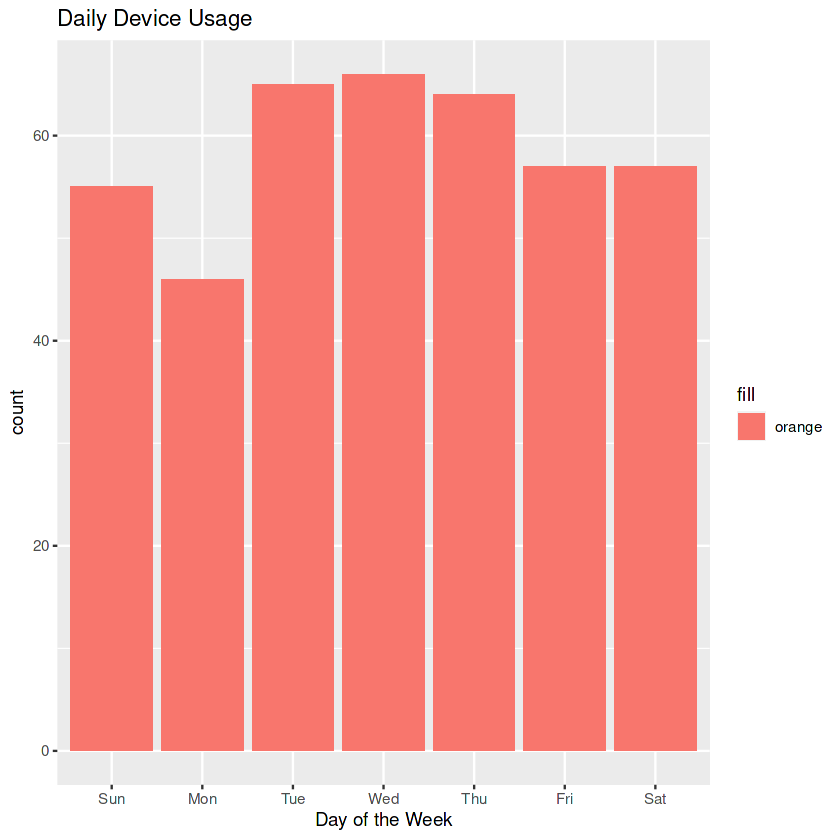

In [90]:
ggplot(data = daily_activity_sleep) +
  geom_bar(mapping = aes(x = day_of_week, fill = 'orange')) +
  labs(title = "Daily Device Usage", x = "Day of the Week")

**Findings:**

Device usage is fairly consistent throughout the week dipping on Mondays and peaking midweek. 

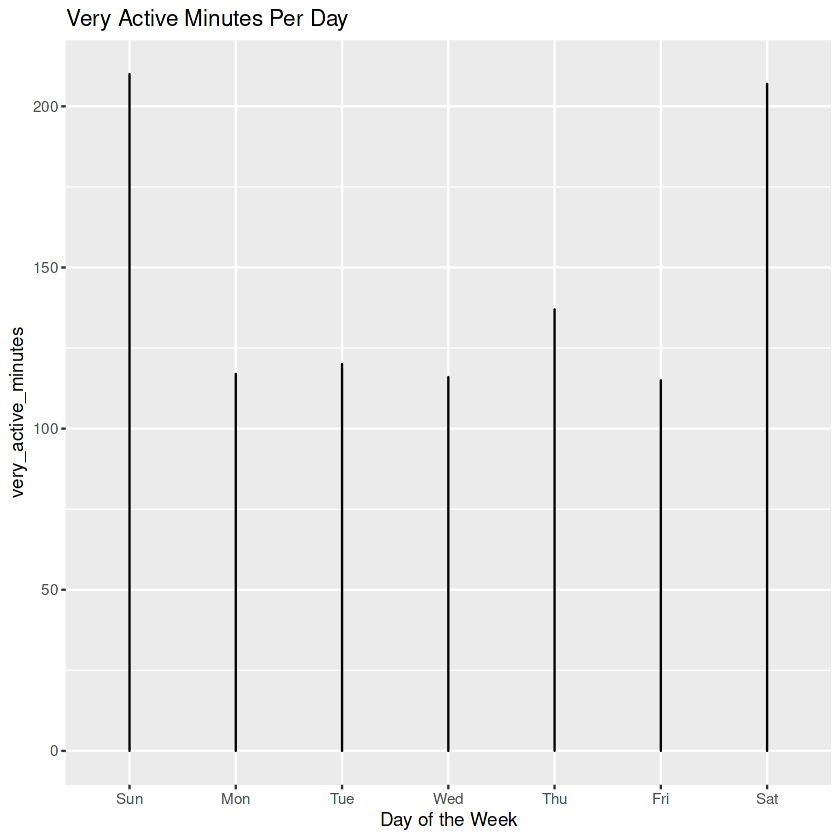

In [117]:
ggplot(data = daily_activity_sleep) +
  geom_line(mapping = aes(x = day_of_week, y = very_active_minutes)) +
  labs(title = "Very Active Minutes Per Day", x = "Day of the Week")

**Findings:**

Users are "very active" more on weekends. 

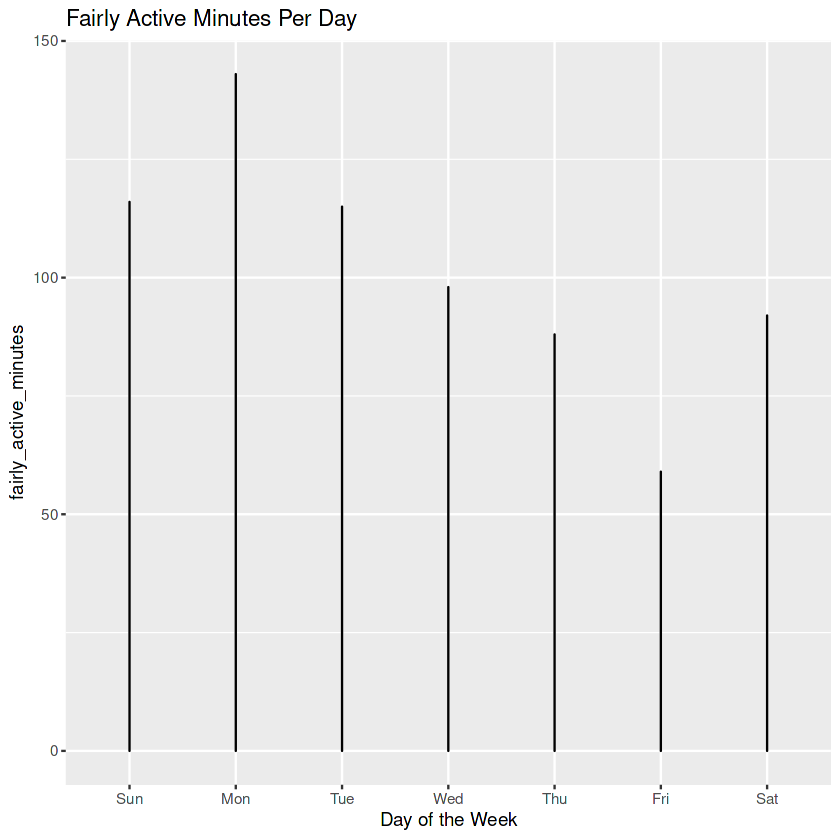

In [105]:
ggplot(data = daily_activity_sleep) +
  geom_line(mapping = aes(x = day_of_week, y = fairly_active_minutes)) +
  labs(title = "Fairly Active Minutes Per Day", x = "Day of the Week")

**Findings:**

Users peak as "fairly active" at the beginning of the week and trend down by Friday with some uptick over the weekend. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


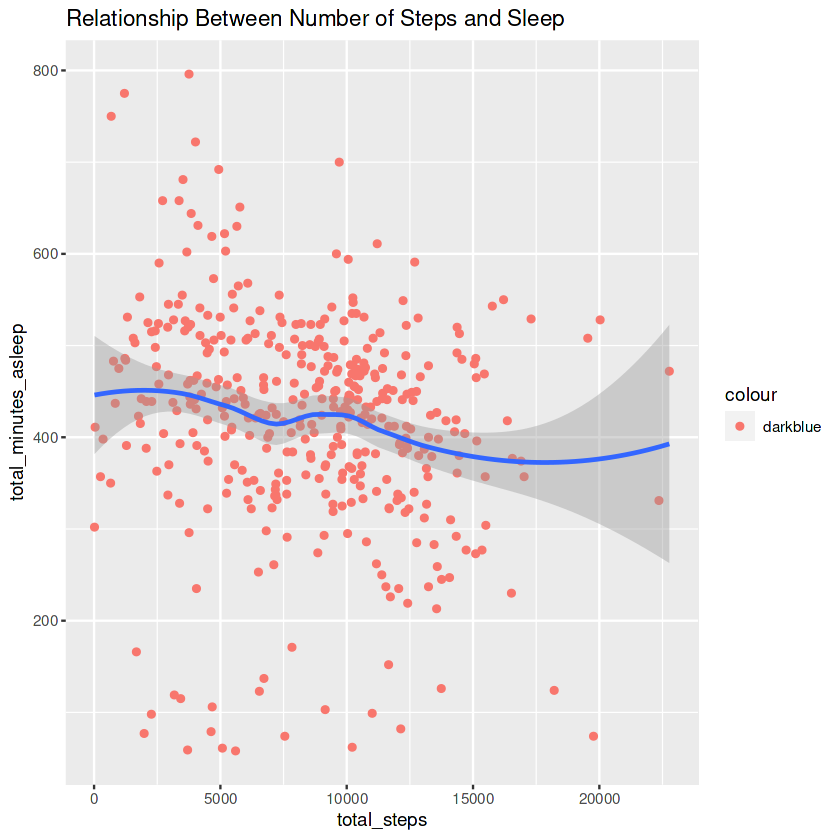

In [124]:
ggplot(data = daily_activity_sleep) +
    geom_point(mapping = aes(x = total_steps, y = total_minutes_asleep, color = "darkblue")) +
    geom_smooth(mapping = aes(x = total_steps, y = total_minutes_asleep)) +
    labs(title = "Relationship Between Number of Steps and Sleep")

There doesn't appear to be a relationship between total steps and total minutes asleep.

# Marketing Strategy Recommendations

**Indications:**

The data indicates the devices are mainly used to track activity levels and sleep. 

The trends indicate users to be consistent with device usage throughout the week. 

**Chosen Product: Bellebeat's Leaf: Bellabeat’s Classic Wellness Tracker** 

Because of it's simplicity and versatility (it can be worn as a bracelet, necklace, or clip), it's probably the easiest to wear throughout the workday and weekend as well as during activity and during sleep. 

The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress. As mentioned above, according to the data analyzed, activity and sleep are what's tracked most consistently throughout the week.

**Marketing Strategy:**

A/B test the Bellebeat Leaf's aesthetic vs. its functionality. Which KPIs show higher click-through and conversion rates. 
Is it favored as jewelry first and a wellness tracker second or vice versa. 

IF:

1. Jewelry/Aesthetic has stronger KPIs: expand the line to include additional designs (i.e. flower, butterfly, etc) and maximize influencer relationships to drive promotion and sales. 

2. Wellness Tracker has stronger KPIs: expand the line to include additional technological features (i.e. notifications and/or targeted marketing messages/blog posts based on how individuals are using their devices. The goal would be to promote adherence in order to keep their subscriptions ongoing.  